<a href="https://colab.research.google.com/github/killer-shark00/Image-Classification-using-python/blob/main/image_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# download dataset 
I used kaggle dataset and downloading it using opendatasets library

In [ ]:
pip install opendatasets --upgrade

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/manohar676/10-class-image-classification'
od.download('https://www.kaggle.com/manohar676/10-class-image-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hrshwrdhn
Your Kaggle Key: ··········


  8%|▊         | 9.00M/114M [00:00<00:01, 75.6MB/s]

100%|██████████| 114M/114M [00:01<00:00, 109MB/s] 


# explore dataset

In [ ]:
import os
# Look into the data directory
data_dir = '/content/10-class-image-classification/10_categories'
#print(os.listdir(data_dir))
classes = os.listdir(data_dir)
print(classes)


['Faces_easy', 'watch', 'car_side', 'bonsai', 'Motorbikes', 'Leopards', 'airplanes', 'BACKGROUND_Google', 'grand_piano', 'Faces']


In [ ]:
len(classes)

10

These are 10 classes.
All dataset is in folder arrangement so I will use `ImageFolder`

In [ ]:
BACKGROUND_Google = os.listdir(data_dir + "/BACKGROUND_Google")
print('No. of training examples for BACKGROUND_Google:', len(BACKGROUND_Google ))
print(BACKGROUND_Google [:5])


No. of training examples for BACKGROUND_Google: 468
['image_0100.jpg', 'image_0018.jpg', 'image_0418.jpg', 'image_0455.jpg', 'image_0166.jpg']


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor


import torchvision.transforms as transforms

transform = transforms.Compose([transforms.Resize(size=(32,32 )), transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [ ]:
dataset = ImageFolder(data_dir, transform)


In [ ]:
img, label = dataset[1244]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 2


tensor([[[-0.5686, -0.5765, -0.5765,  ..., -0.3255, -0.3333, -0.3255],
         [-0.4824, -0.4745, -0.4745,  ..., -0.2863, -0.2863, -0.2706],
         [-0.4667, -0.4588, -0.4510,  ..., -0.2157, -0.2314, -0.2314],
         ...,
         [-0.7098, -0.7490, -0.7490,  ..., -0.8902, -0.7647, -0.7569],
         [-0.6863, -0.7333, -0.7961,  ..., -0.8980, -0.8353, -0.7804],
         [-0.7569, -0.7176, -0.7647,  ..., -0.8118, -0.8588, -0.7804]],

        [[-0.4902, -0.4980, -0.5059,  ..., -0.2157, -0.2235, -0.2314],
         [-0.4353, -0.4275, -0.4275,  ..., -0.1529, -0.1686, -0.1686],
         [-0.4353, -0.4196, -0.4039,  ..., -0.1137, -0.1294, -0.1294],
         ...,
         [-0.7255, -0.7647, -0.7569,  ..., -0.8902, -0.7725, -0.7647],
         [-0.6784, -0.7333, -0.8039,  ..., -0.8980, -0.8353, -0.7882],
         [-0.7490, -0.7176, -0.7725,  ..., -0.8039, -0.8431, -0.7804]],

        [[-0.5059, -0.5059, -0.4824,  ..., -0.5216, -0.5294, -0.5373],
         [-0.4667, -0.4510, -0.4353,  ..., -0

In [ ]:
print(dataset.classes)



['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai', 'car_side', 'grand_piano', 'watch']


In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  Leopards (3)


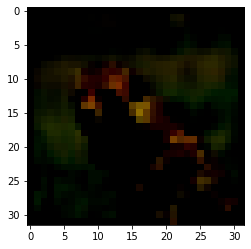

In [ ]:
show_example(*dataset[1455])

# random split, dataset and dataloader

In [ ]:

import torch
import torchvision


from torch.utils.data import random_split

In [ ]:
val_size = 500
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(3224, 500)

In [ ]:
img,_ = val_ds[0]
img.shape

torch.Size([3, 32, 32])

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=64
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=1, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=1, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


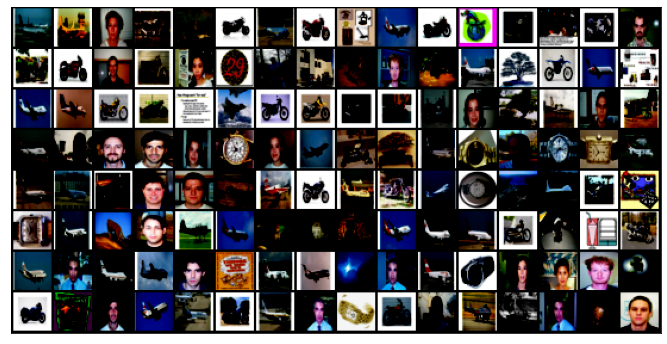

In [ ]:
show_batch(val_dl)


# GPU 

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)

#Model and training function

In [ ]:
import torch.nn as nn
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
import torch.nn.functional as F
history = [evaluate(model, valid_dl)]
history


[{'val_acc': 0.10870151221752167, 'val_loss': 2.289062976837158}]

In [ ]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00389, train_loss: 0.8358, val_loss: 0.8318, val_acc: 0.7801
Epoch [1], last_lr: 0.00935, train_loss: 0.6187, val_loss: 2.7453, val_acc: 0.6224
Epoch [2], last_lr: 0.00972, train_loss: 0.6161, val_loss: 0.5314, val_acc: 0.8737
Epoch [3], last_lr: 0.00812, train_loss: 0.4099, val_loss: 0.3876, val_acc: 0.8895
Epoch [4], last_lr: 0.00556, train_loss: 0.2106, val_loss: 0.3260, val_acc: 0.9042
Epoch [5], last_lr: 0.00283, train_loss: 0.1619, val_loss: 0.2048, val_acc: 0.9417
Epoch [6], last_lr: 0.00077, train_loss: 0.0431, val_loss: 0.1727, val_acc: 0.9513
Epoch [7], last_lr: 0.00000, train_loss: 0.0237, val_loss: 0.1730, val_acc: 0.9552
CPU times: user 5.38 s, sys: 998 ms, total: 6.38 s
Wall time: 1min 2s


# TEST 

In [ ]:
test_dir = '/content/10-class-image-classification/cute _04_image classification_10_categories/10_categories'

In [ ]:
transform = transforms.Compose([transforms.Resize(size=(32,32 )), transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])
testds = ImageFolder(test_dir,transform)

In [ ]:
testds.classes

['BACKGROUND_Google',
 'Faces',
 'Faces_easy',
 'Leopards',
 'Motorbikes',
 'airplanes',
 'bonsai',
 'car_side',
 'grand_piano',
 'watch']

In [ ]:
testloader = DataLoader(testds, batch_size*2, num_workers=1, pin_memory=True)

In [ ]:
testloader = DeviceDataLoader(testloader , device)

In [ ]:
evaluate(model, testloader )

{'val_acc': 0.9894096851348877, 'val_loss': 0.03515355661511421}

In [ ]:
evaluate(model, valid_dl)

{'val_acc': 0.9552128314971924, 'val_loss': 0.17304565012454987}

# something is wrong? why because of resizing to image on 32*32, features have been lost....

In [ ]:
img,_ = testds[1]
img.shape

torch.Size([3, 32, 32])

# start again

In [ ]:
from PIL import Image
  
# open method used to open different extension image file
im = Image.open(r"/content/10-class-image-classification/cute _04_image classification_10_categories/10_categories/Faces/image_0001.jpg") 
  
# This method will show image in any image viewer 
im.size

(510, 337)

In [ ]:
transform2 = transforms.Compose([transforms.Resize(size=(256,256 )), transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])
testds = ImageFolder(test_dir,transform)


In [ ]:
dataset = ImageFolder(data_dir, transform2)

In [ ]:
val_size = 500
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(3224, 500)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
batch_size= 8
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=1, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=1, pin_memory=True)

In [ ]:
import torchvision.models as models

In [ ]:
resnet18 = models.resnet18(pretrained=True)

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)

In [ ]:
from torchvision import models

class Model(ImageClassificationBase):
    def __init__(self, num_classes, pretrained=True):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet18(pretrained=pretrained)
        # Replace last layer
        self.network.fc = nn.Linear(self.network.fc.in_features, num_classes)

    def forward(self, xb):
        return self.network(xb)

In [ ]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = Model(10)
to_device(model, device);

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.06640625, 'val_loss': 2.5137722492218018}]

In [ ]:
epochs = 6
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                         grad_clip=grad_clip, 
                         weight_decay=weight_decay, 
                         opt_func=opt_func)


Epoch [0], last_lr: 0.00602, train_loss: 0.9169, val_loss: 1.9455, val_acc: 0.5625



Epoch [1], last_lr: 0.00994, train_loss: 1.0550, val_loss: 0.6874, val_acc: 0.8027



Epoch [2], last_lr: 0.00812, train_loss: 0.5347, val_loss: 0.7635, val_acc: 0.7598



Epoch [3], last_lr: 0.00463, train_loss: 0.4019, val_loss: 0.2469, val_acc: 0.9160



Epoch [4], last_lr: 0.00133, train_loss: 0.2047, val_loss: 0.1144, val_acc: 0.9629



Epoch [5], last_lr: 0.00000, train_loss: 0.0816, val_loss: 0.1193, val_acc: 0.9668
CPU times: user 57.5 s, sys: 8.01 s, total: 1min 5s
Wall time: 2min 9s


In [ ]:

testds = ImageFolder(test_dir,transform2)

In [ ]:
testloader = DataLoader(testds, batch_size*2, num_workers=1, pin_memory=True)

In [ ]:
testloader = DeviceDataLoader(testloader , device)

In [ ]:
evaluate(model, testloader)

{'val_acc': 0.9862303137779236, 'val_loss': 0.05003559589385986}

In [ ]:
evaluate(model,  valid_dl)

{'val_acc': 0.978515625, 'val_loss': 0.06467430293560028}